# Scikitlearn Ridge Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


Bad key "text.kerning_factor" on line 4 in
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Simple Linear Regression Model

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
preds = lr.predict(X_test)

In [9]:
mean_squared_error(y_test, preds)

17.8784161461471

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [11]:
rmse

4.228287613933931

### Modeling Function

In [12]:
def make_model(estimator, X_train, X_test, standardize = False):
    sscaler = StandardScaler()
    if standardize:
        X_train = sscaler.fit_transform(X_train)
        X_test = sscaler.transform(X_test)
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return np.sqrt(mse)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
lr2 = LinearRegression(fit_intercept=False)

In [15]:
make_model(lr2, X_train, X_test)

5.594244480687728

In [16]:
ridge = Ridge()

In [17]:
make_model(ridge, X_train, X_test, standardize=True)

5.153999218365008

In [18]:
alphas = np.logspace(0, 1, 1000)
results = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    results.append(make_model(ridge, X_train, X_test, standardize = True))

Text(0, 0.5, 'RMSE')

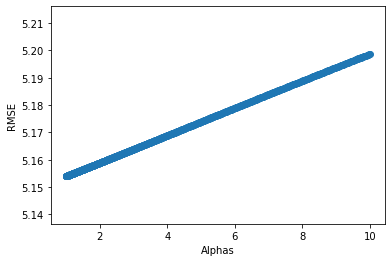

In [19]:
plt.scatter(alphas, results)
plt.xlabel('Alphas')
plt.ylabel('RMSE')

In [20]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [21]:
ridge_cv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 10, 100, 1000), cv = 5)

In [22]:
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.e-02, 5.e-02, 1.e-01, 5.e-01, 1.e+01, 1.e+02, 1.e+03]),
        cv=5)

In [23]:
ridge_cv.alpha_

10.0

In [24]:
preds = ridge_cv.predict(X_test_scaled)

In [25]:
np.sqrt(mean_squared_error(preds, y_test))

5.19865754683543

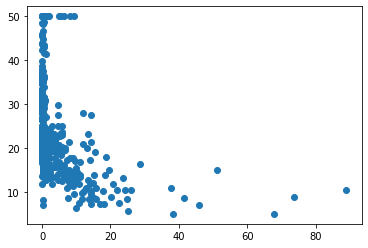

In [26]:
plt.scatter(X[:, 0], y)

In [27]:
def make_model(estimator, X_train, X_test, standardize = False):
    sscaler = StandardScaler()
    if standardize:
        X_train = sscaler.fit_transform(X_train.reshape(-1,1))
        X_test = sscaler.transform(X_test.reshape(-1,1))
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    plt.scatter(X[:, 0], y)
    plt.scatter(X_test[:, 0], preds)
    plt.title(f'RMSE: {np.sqrt(mse)}')

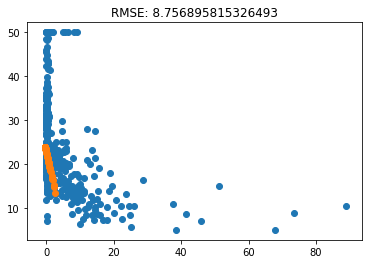

In [28]:
make_model(lr, X_train[:, 0], X_test[:, 0], standardize=True)

In [29]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('scale', StandardScaler()), 
                ('lr', LinearRegression())])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scale', StandardScaler()),
                ('lr', LinearRegression())])

In [31]:
preds = pipe.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, preds))

6.335157474823307

In [33]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('scale', StandardScaler()), 
                ('lr', Ridge())])

In [34]:
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

3.2427370687084864

In [35]:
preds = pipe.predict(X_train)
np.sqrt(mean_squared_error(y_train, preds))

2.713379448747404

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'poly__degree': [1, 2, 3],
         'lr__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

In [45]:
grid = GridSearchCV(pipe, param_grid=params, cv = 25, scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

preds = grid.predict(X_test)
np.sqrt(mean_squared_error(preds, y_test))

preds = grid.predict(X_train)
np.sqrt(mean_squared_error(preds, y_train))

In [47]:
grid2 = GridSearchCV(pipe, param_grid=params, cv = 5, scoring = 'neg_mean_squared_error')

grid2.fit(X_train, y_train)

preds = grid2.predict(X_test)
print(np.sqrt(mean_squared_error(preds, y_test)))

preds2 = grid2.predict(X_train)
print(np.sqrt(mean_squared_error(preds2, y_train)))

3.2427370687084864
2.713379448747404


In [54]:
grid3 = GridSearchCV(pipe, param_grid=params, cv = 5, scoring = 'neg_mean_squared_error')

grid3.fit(X_train, y_train)

preds = grid3.predict(X_test)
print(np.sqrt(mean_squared_error(preds, y_test)))

preds3 = grid3.predict(X_train)
print(np.sqrt(mean_squared_error(preds3, y_train)))

3.2427370687084864
2.713379448747404


In [55]:
grid3.best_params_

{'lr__alpha': 1.0, 'poly__degree': 2}